<a href="https://colab.research.google.com/github/nitin-khandagale/machine_learning_practice/blob/master/Presidential_Debate_2016_Bag_of_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import requests
from bs4 import BeautifulSoup
import re

In [24]:
pagination = []

for page in range(1,4):
  link = "https://www.christianpost.com/news/trump-vs-clinton-in-third-presidential-debate-2016-full-transcript.html?page={}".format(page)
  pagination.append(link)


In [25]:
pagination

['https://www.christianpost.com/news/trump-vs-clinton-in-third-presidential-debate-2016-full-transcript.html?page=1',
 'https://www.christianpost.com/news/trump-vs-clinton-in-third-presidential-debate-2016-full-transcript.html?page=2',
 'https://www.christianpost.com/news/trump-vs-clinton-in-third-presidential-debate-2016-full-transcript.html?page=3']

In [26]:
paragraphs = []
p_tags = []

for page in pagination:
  ro = requests.get(page)
  soup = BeautifulSoup(ro.content, 'html5')
  ps = soup.find_all('p')
  print("=============================================================================================================================================================")
  print(ps)
  p_tags.append(ps)


[<p class="visually-hidden">The Christian Post</p>, <p class="enable-js"> To enjoy our website, you'll need to enable <b>JavaScript</b> in your web browser. Please <a href="http://enable-javascript.com/" target="_blank"><b>click here</b></a> to learn how. </p>, <p>Donald Trump and Hillary Clinton had their third and final debate on October 19 at the University of Nevada, Las Vegas. The six topics they discussed during the 90 minute debate included: the economy, immigration, national debt and entitlements, the Supreme Court, foreign problems and "fitness to be president."</p>, <p>Here is the transcript of the third U.S. presidential debate between the 2016 Republican Presidential Nominee Donald Trump and Democratic Presidential Nominee Hillary Clinton held live in Las Vegas, Nevada. The debate was moderated by Chris Wallace, host of Fox News Sunday.</p>, <p><strong>WALLACE:</strong> Good evening from the Thomas and Mack Center at the University of Nevada, Las Vegas. I'm Chris Wallace of

In [27]:
transcript = []

for tag in p_tags:
  for t in tag:
    transcript.append(t.get_text())

In [28]:
for line in range(len(transcript)):
  transcript[line] = transcript[line].replace(u'\xa0', u' ')

In [29]:
transcript[:10]

['The Christian Post',
 " To enjoy our website, you'll need to enable JavaScript in your web browser. Please click here to learn how. ",
 'Donald Trump and Hillary Clinton had their third and final debate on October 19 at the University of Nevada, Las Vegas. The six topics they discussed during the 90 minute debate included: the economy, immigration, national debt and entitlements, the Supreme Court, foreign problems and "fitness to be president."',
 'Here is the transcript of the third U.S. presidential debate between the 2016 Republican Presidential Nominee Donald Trump and Democratic Presidential Nominee Hillary Clinton held live in Las Vegas, Nevada. The debate was moderated by Chris Wallace, host of Fox News Sunday.',
 "WALLACE: Good evening from the Thomas and Mack Center at the University of Nevada, Las Vegas. I'm Chris Wallace of Fox News, and I welcome you to the third and final of the 2016 presidential debates between Secretary of State Hillary Clinton and Donald J. Trump.",


In [30]:
trump_arguments = []
clinton_arguments = []

In [31]:
for sen in range(len(transcript)):
  if transcript[sen].startswith('TRUMP'):
    trump_arguments.append(transcript[sen])

  elif transcript[sen].startswith('CLINTON'):
    clinton_arguments.append(transcript[sen])


In [32]:
for arg in range(len(trump_arguments)):
  trump_arguments[arg] = trump_arguments[arg].split(' ',1)[1:]

In [33]:
for arg in range(len(clinton_arguments)):
  clinton_arguments[arg] = clinton_arguments[arg].split(' ',1)[1:]

In [34]:
clinton_arguments[:10]

[["Thank you very much, Chris. And thanks to UNLV for hosting us. You know, Ithink when we talk about the Supreme Court, it really raises the central issue in this election, namely, what kind of country are we going to be? What kind of opportunities will we provide for our citizens? What kind of rights will Americans have? And Ifeel strongly that the Supreme Court needs to stand on the side of the American people, not on the side of the powerful corporations and the wealthy. For me, that means that we need a Supreme Court that will stand up on behalf of women's rights, on behalf of the rights of the LGBT community, that will stand up and say no to Citizens United, a decision that has undermined the election system in our country because of the way it permits dark, unaccountable money to come into our electoral system. I have major disagreements with my opponent about these issues and others that will be before the Supreme Court. But I feel that at this point in our country's history, i

In [35]:
trump_arguments[:10]

[["Well, first of all, it's great to be with you, and thank you, everybody. The Supreme Court:It's what it's all about. Our country is so, so \xad\xad it's just so imperative that we have the right justices. Something happened recently where Justice Ginsburg made some very, very inappropriate statements toward me and toward a tremendous number of people, many, many millions of people that I represent. And she was forced to apologize. And apologize she did. But these were statements that should never, ever have been made. We need a Supreme Court that in my opinion is going to uphold the Second Amendment, and all amendments, but the Second Amendment, which is under absolute siege. I believe if my opponent should win this race, which Itruly don't think will happen, we will have a Second Amendment which will be a very, very small replica of what it is right now. But I feel that it's absolutely important that we uphold, because of the fact that it is under such trauma. Ifeel that the justic

In [36]:
trump_text = []
clinton_text = []

for arg in range(len(trump_arguments)):
  trump_text.append(''.join(trump_arguments[arg]))

for arg in range(len(clinton_arguments)):
  clinton_text.append(''.join(clinton_arguments[arg]))

trump_text = ''.join(trump_text)
clinton_text = ''.join(clinton_text)

In [37]:
clinton_text

'Thank you very much, Chris. And thanks to UNLV for hosting us. You know, Ithink when we talk about the Supreme Court, it really raises the central issue in this election, namely, what kind of country are we going to be? What kind of opportunities will we provide for our citizens? What kind of rights will Americans have? And Ifeel strongly that the Supreme Court needs to stand on the side of the American people, not on the side of the powerful corporations and the wealthy. For me, that means that we need a Supreme Court that will stand up on behalf of women\'s rights, on behalf of the rights of the LGBT community, that will stand up and say no to Citizens United, a decision that has undermined the election system in our country because of the way it permits dark, unaccountable money to come into our electoral system. I have major disagreements with my opponent about these issues and others that will be before the Supreme Court. But I feel that at this point in our country\'s history, i

In [38]:
clinton_text = re.sub("[^a-zA-Z]+", ' ', clinton_text)
trump_text = re.sub("[^a-zA-Z]+", ' ', trump_text)

In [39]:
from nltk.tokenize import word_tokenize

In [40]:
trump_words = word_tokenize(trump_text)
clinton_words = word_tokenize(clinton_text)

In [41]:
for word in range(len(trump_words)):
  trump_words[word] = trump_words[word].lower()

for word in range(len(clinton_words)):
  clinton_words[word] = clinton_words[word].lower()

In [42]:
from nltk.corpus import stopwords

In [43]:
stop_words = stopwords.words('english')

In [44]:
trump_script = [word for word in trump_words if not word in stop_words]
clinton_script = [word for word in clinton_words if not word in stop_words]

In [45]:
len(trump_words), len(trump_script)

(3896, 1603)

In [46]:
len(clinton_words), len(clinton_script)

(4289, 1911)

In [47]:
trump_script[:10]

['well',
 'first',
 'great',
 'thank',
 'everybody',
 'supreme',
 'court',
 'country',
 'imperative',
 'right']

In [48]:
from nltk.stem import WordNetLemmatizer

In [49]:
wl = WordNetLemmatizer()

In [50]:
for word in range(len(trump_script)):
  trump_script[word] = wl.lemmatize(trump_script[word])

In [51]:
for word in range(len(clinton_script)):
  clinton_script[word] = wl.lemmatize(clinton_script[word])

In [52]:
trump_script[:10]

['well',
 'first',
 'great',
 'thank',
 'everybody',
 'supreme',
 'court',
 'country',
 'imperative',
 'right']

In [53]:
trump_counter = {}

for word in trump_script:
  if word not in trump_counter.keys():
    trump_counter[word] = 1
  else:
    trump_counter[word] += 1

In [54]:
clinton_counter = {}

for word in clinton_script:
  if word not in clinton_counter.keys():
    clinton_counter[word] = 1
  else:
    clinton_counter[word] += 1

In [57]:
from heapq import nlargest

In [86]:
trump_word_freq = nlargest(20, trump_counter, key=trump_counter.get)
clinton_word_freq = nlargest(20, clinton_counter, key=clinton_counter.get)

In [87]:
trump_word_freq

['people',
 'country',
 'border',
 'many',
 'hillary',
 'putin',
 'justice',
 'amendment',
 'believe',
 'job',
 'obama',
 'bad',
 'deal',
 'great',
 'second',
 'state',
 'year',
 'thing',
 'happened',
 'million']

In [88]:
import matplotlib.pyplot as plt


In [89]:
trump_top_words = []

for word in trump_word_freq:
  trump_top_words.append(trump_counter[word])

In [90]:
clinton_top_words = []

for word in clinton_word_freq:
  clinton_top_words.append(clinton_counter[word])

In [67]:
import plotly.express as px

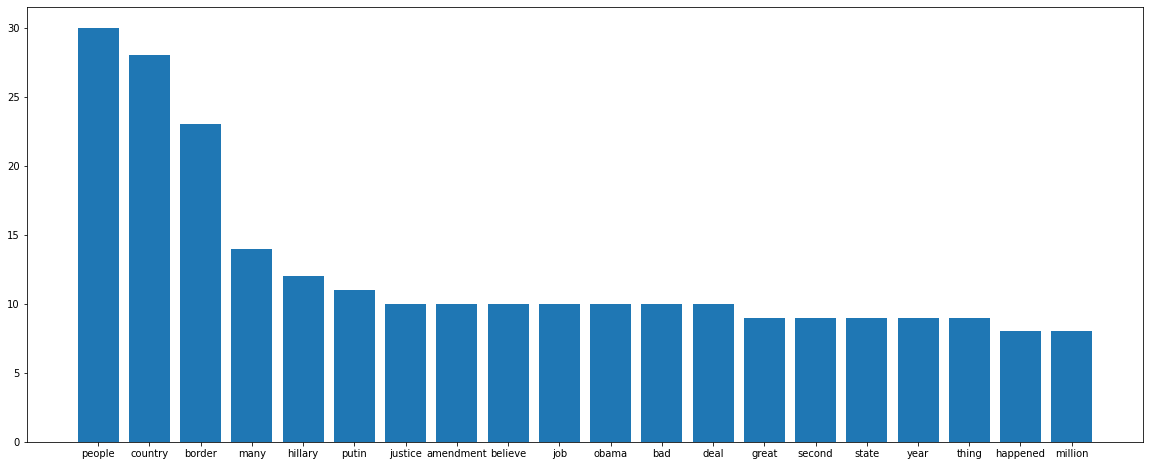

In [111]:
plt.figure(figsize=(20,8))
plt.bar(trump_word_freq, trump_top_words)
plt.show()

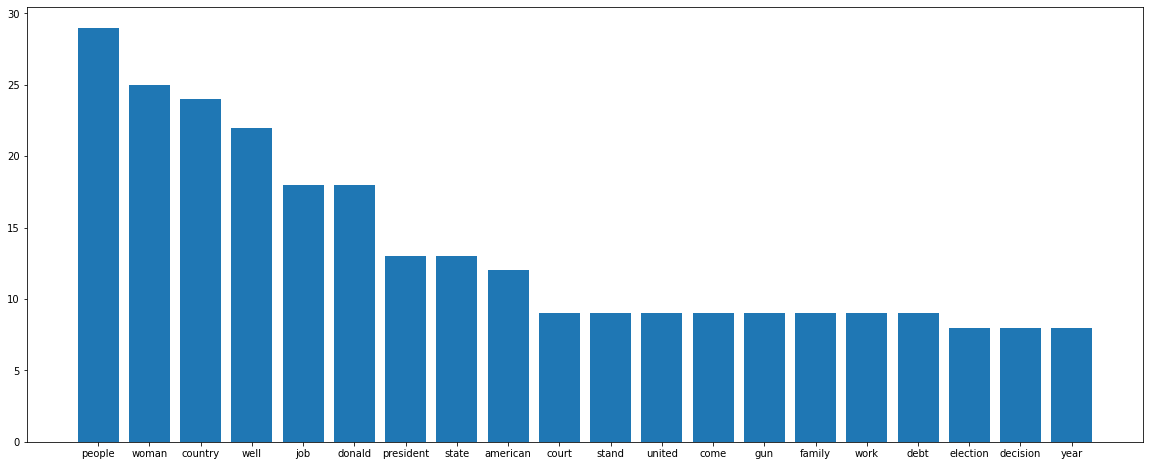

In [112]:
plt.figure(figsize=(20,8))
plt.bar(clinton_word_freq, clinton_top_words)
plt.show()